# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


630

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
#url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "Imperial"
# Build query URL
url = f"{url}units={units}&appid={api_key}"
# Create empty list
cityname = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
maxtemp = []
windspeed = []

# Make the first row number 
row_number = 1

#Loop for cities 
for city in cities:  
    try: 
        response = requests.get(f"{url}&q={city}").json() 
        cityname.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        maxtemp.append(response["main"]["temp_max"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        windspeed.append(response["wind"]["speed"])
        cityrecord = response["name"]
        print(f"Processing Record {row_number} | {city}")
        # Make all row numbers for each city  
        row_number= row_number + 1
        
        # Wait a second in loop to not over exceed rate limit of API
        time.sleep(1.01)
        
    # If no record found "skip" to next call
    except:
        print("City not found. Skipping...")
    continue

# Create a dictonary with the lists generated
weatherpy_dict = {
    "City": cityname,
    "Cloudiness":cloudiness, 
    "Country":country,
    "Date":date, 
    "Humidity": humidity,
    "Lat":lat, 
    "Lng":lng, 
    "Max Temp": maxtemp,
    "Wind Speed":windspeed
}



Processing Record 1 | ostrovnoy
Processing Record 2 | tabuk
Processing Record 3 | russell
Processing Record 4 | castro
Processing Record 5 | ushuaia
Processing Record 6 | clyde river
Processing Record 7 | san patricio
City not found. Skipping...
Processing Record 8 | caravelas
Processing Record 9 | busselton
Processing Record 10 | kortkeros
Processing Record 11 | tasiilaq
Processing Record 12 | road town
Processing Record 13 | vaini
Processing Record 14 | boca do acre
Processing Record 15 | lagoa
Processing Record 16 | taltal
Processing Record 17 | mulchen
Processing Record 18 | nikolskoye
Processing Record 19 | santa marta
Processing Record 20 | bjornevatn
Processing Record 21 | janesville
Processing Record 22 | ajdabiya
Processing Record 23 | arraial do cabo
Processing Record 24 | hithadhoo
City not found. Skipping...
Processing Record 25 | coquimbo
City not found. Skipping...
Processing Record 26 | sechura
Processing Record 27 | avarua
Processing Record 28 | hobyo
Processing Record 

City not found. Skipping...
Processing Record 232 | santa isabel do rio negro
Processing Record 233 | tiksi
City not found. Skipping...
Processing Record 234 | talnakh
Processing Record 235 | forbes
Processing Record 236 | chokurdakh
Processing Record 237 | fortuna
Processing Record 238 | mount gambier
City not found. Skipping...
Processing Record 239 | vila velha
Processing Record 240 | faanui
Processing Record 241 | richards bay
Processing Record 242 | ballina
Processing Record 243 | saint-raymond
Processing Record 244 | columbus
Processing Record 245 | kjollefjord
Processing Record 246 | makakilo city
Processing Record 247 | yulara
Processing Record 248 | rock falls
City not found. Skipping...
City not found. Skipping...
Processing Record 249 | saint anthony
City not found. Skipping...
Processing Record 250 | kapit
Processing Record 251 | baghdad
City not found. Skipping...
Processing Record 252 | irati
Processing Record 253 | east london
Processing Record 254 | oia
Processing Recor

Processing Record 448 | kailua
Processing Record 449 | moree
Processing Record 450 | enugu
Processing Record 451 | kitchener
Processing Record 452 | khasan
Processing Record 453 | prince rupert
Processing Record 454 | saba
Processing Record 455 | pyatnitskoye
Processing Record 456 | yumen
Processing Record 457 | kodinsk
Processing Record 458 | mogocha
Processing Record 459 | bereda
Processing Record 460 | gat
Processing Record 461 | akdepe
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
Processing Record 462 | lokosovo
Processing Record 463 | morristown
Processing Record 464 | griffith
Processing Record 465 | sur
Processing Record 466 | kutum
Processing Record 467 | honningsvag
Processing Record 468 | ayan
Processing Record 469 | cayenne
Processing Record 470 | saurimo
Processing Record 471 | tongliao
Processing Record 472 | aluksne
Processing Record 473 | port hardy
Processing Record 474 | fergus falls
Processing Record 475 | svay rieng
Processing R

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
# Create a data frame from dictionary
cities_weather = pd.DataFrame(weatherpy_dict)

# Save data frame to CSV
cities_weather.to_csv('C:/Users/Kyoo Ha Cha/Desktop/SMUGitlab/SMU_Homework/Unit_06_Python_APIs/Instructions/starter_code/cities_weather.csv')

# Display data frame head 
cities_weather.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Ostrovnoy,100,RU,1569796348,91,68.05,39.51,41.86,10.98
1,Tabuk,100,PH,1569796349,91,17.41,121.44,69.16,2.66
2,Russell,40,US,1569796324,55,38.90,-98.86,89.60,28.86
3,Castro,20,CL,1569796124,81,-42.48,-73.76,44.60,11.41
4,Ushuaia,75,AR,1569796077,80,-54.81,-68.31,35.60,11.41


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

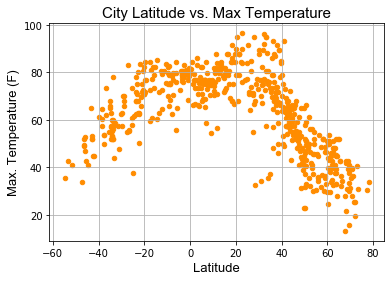

In [43]:
# Build a scatter plot for each data type
plt.scatter(cities_weather["Lat"], cities_weather["Max Temp"], marker="o", s=20, color="darkorange")
plt.title("City Latitude vs. Max Temperature",fontname="Arial",fontsize=15)
plt.ylabel("Max. Temperature (F)",fontname="Arial",fontsize=13)
plt.xlabel("Latitude",fontname="Arial",fontsize=13)
plt.grid(True)
plt.savefig("C:/Users/Kyoo Ha Cha/Desktop/SMUGitlab/SMU_Homework/Unit_06_Python_APIs/Instructions/starter_code/LatitudevsTemperature.png")

#### Latitude vs. Humidity Plot

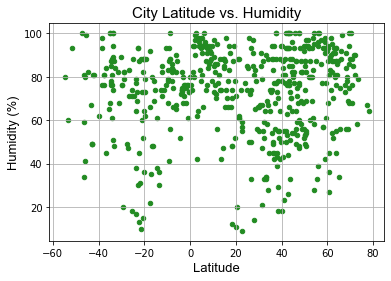

In [40]:
# Build a scatter plot for each data type
plt.scatter(cities_weather["Lat"], cities_weather["Humidity"], marker="o", s=20, color="forestGreen")
plt.title("City Latitude vs. Humidity",fontname="Arial",fontsize=15)
plt.ylabel("Humidity (%)",fontname="Arial",fontsize=13)
plt.xlabel("Latitude",fontname="Arial",fontsize=13)
plt.grid(True)
plt.savefig("C:/Users/Kyoo Ha Cha/Desktop/SMUGitlab/SMU_Homework/Unit_06_Python_APIs/Instructions/starter_code/LatitudevsHumidity.png")

#### Latitude vs. Cloudiness Plot

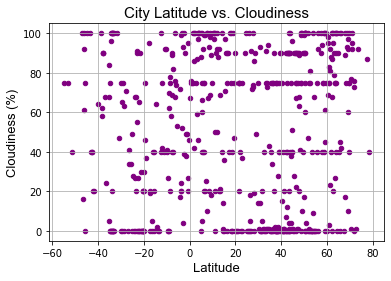

In [39]:
# Build a scatter plot for each data type
plt.scatter(cities_weather["Lat"], cities_weather["Cloudiness"], marker="o", s=20, color="purple")
plt.title("City Latitude vs. Cloudiness",fontname="Arial",fontsize=15)
plt.ylabel("Cloudiness (%)",fontname="Arial",fontsize=13)
plt.xlabel("Latitude",fontname="Arial",fontsize=13)
plt.grid(True)
plt.savefig("C:/Users/Kyoo Ha Cha/Desktop/SMUGitlab/SMU_Homework/Unit_06_Python_APIs/Instructions/starter_code/LatitudevsCloudiness.png")

#### Latitude vs. Wind Speed Plot

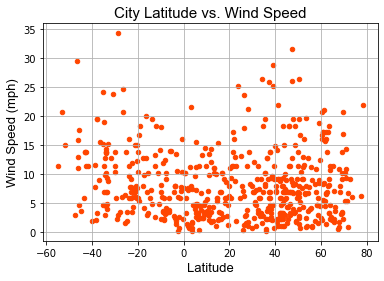

In [37]:
# Build a scatter plot for each data type
plt.scatter(cities_weather["Lat"], cities_weather["Wind Speed"], marker="o", s=20, color="orangered")
plt.title("City Latitude vs. Wind Speed",fontname="Arial",fontsize=15)
plt.ylabel("Wind Speed (mph)",fontname="Arial",fontsize=13)
plt.xlabel("Latitude",fontname="Arial",fontsize=13)
plt.grid(True)
plt.savefig("C:/Users/Kyoo Ha Cha/Desktop/SMUGitlab/SMU_Homework/Unit_06_Python_APIs/Instructions/starter_code/LatitudevsWindSpeed.png")